In [59]:
import json
%reload_ext autoreload
%autoreload 2
from src.utils.clean_prediction import extract_numbers
import matplotlib.pyplot as plt

In [60]:
path_dict={
    "With reason":"results/1216_practice10_20231216_151130.json",
    "W/o reason":"results/1216_practice10_20231216_151324.json"
}

path=path_dict["With reason"]
path=path_dict["W/o reason"]




215
240
234
[215, 240, 234]
81°C
81°C
80-82
[81, 81, 80, 82]
168-170°C
248°C
248°C
[168, 170, 248, 248]
25°C
25-30 degrees Celsius
Around 20-25°C
[25, 25, 30, 20, 25]
99°C
99.0
99°C
[99, 99, 0, 99]
Approximately 177°C
177°C
177°C
[177, 177, 177]
around 207°C
about 156.6°C
15
[207, 156, 6, 15]
190°C
144
190
[190, 144, 190]
Estimated melting point: 200-220°C
The predicted melting point of  is 160-165°C.
Estimated melting point: 150-160°C
[200, 220, 160, 165, 150, 160]
Estimated melting point: 250°C
Estimated melting point: 300 degrees Celsius
Estimated melting point: 300 degrees Celsius
[250, 300, 300]
79-82°C
81.5 °C
72.2
[79, 82, 81, 5, 72, 2]
Unknown
Unknown
Unknown
[]
56.6 °C
46-48°C
Unknown
[56, 6, 46, 48]
134.8 °C
128°C
120-125°C
[134, 8, 128, 120, 125]
Data not available
Unknown
Unknown
[]
156.6 °C
78.37°C
78.37 °C
[156, 6, 78, 37, 78, 37]
Unknown
250°C
No melting point data available
[250]


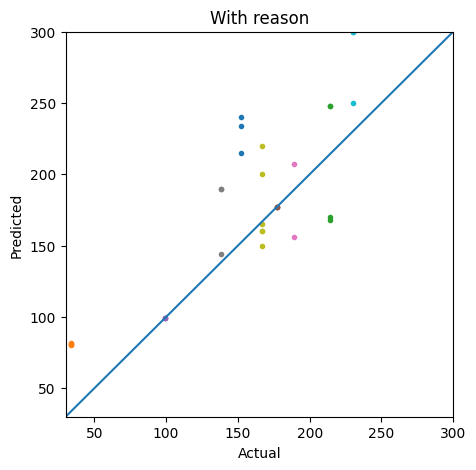

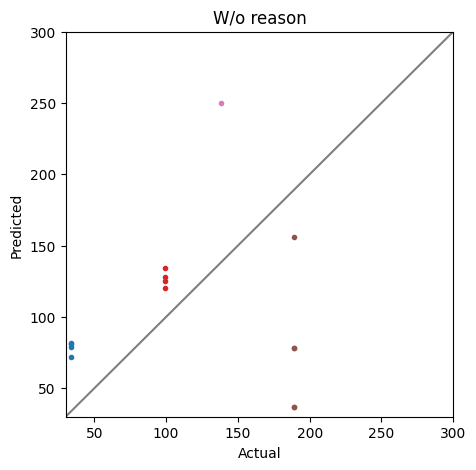

In [63]:
for k,path in path_dict.items():
    with open(path) as f:
        records=json.load(f)

    for record in records:
        cleaned_predictions=[]

        if "predicted_values" not in record:
            continue
        for pred in record["predicted_values"]:
            pred=str(pred)
            #remove name & smiles
            pred=pred.replace(record["name"],"")
            pred=pred.replace(record["smiles"],"")

            # 数値をclean
            #TODO: cleaningの精度が100%ではないので、そのうち直す
            for nums in extract_numbers([pred])[0]:
                for num in nums:
                    cleaned_predictions.append(num)
            print(pred)
        print(cleaned_predictions )
        record["cleaned_predictions"]=cleaned_predictions   


    plt.figure(figsize=(5,5))
    #valueと cleaned_predictionsの比較をplot
    for record in records:
        if "cleaned_predictions" not in record:
            continue
        len_pred=len(record["cleaned_predictions"])
        truth_val=[record["value"]]*len_pred
        plt.plot(truth_val,record["cleaned_predictions"],".")

    plt.xlim(30,300)
    plt.ylim(30,300)
    #対角線
    plt.plot([0,300],[0,300])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k)

In [62]:
truth_val

[138.0]